In [1]:
import pandas as pd

# Load the dataset
file_path = 'healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
stroke_data.head(), stroke_data.info(), stroke_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None,
                  id        

---
# Statistical Summary:

* The age attribute ranges from 0.08 to 82 years, suggesting a wide variety of patient ages.
* Hypertension and heart_disease are relatively rare conditions within this dataset, with only about 9.7% and 5.4% of patients having hypertension and heart disease, respectively.
* The avg_glucose_level and bmi show a wide range of values, indicating varied health conditions among the patients.
* Only about 4.87% of the entries are cases where the patient had a stroke.
* Missing Values: The bmi attribute has some missing values (201 entries).

Next steps involve deeper exploratory data analysis to uncover relationships between the features and the target variable (stroke), handling missing values, encoding categorical variables, and normalizing numerical features for model building.

---

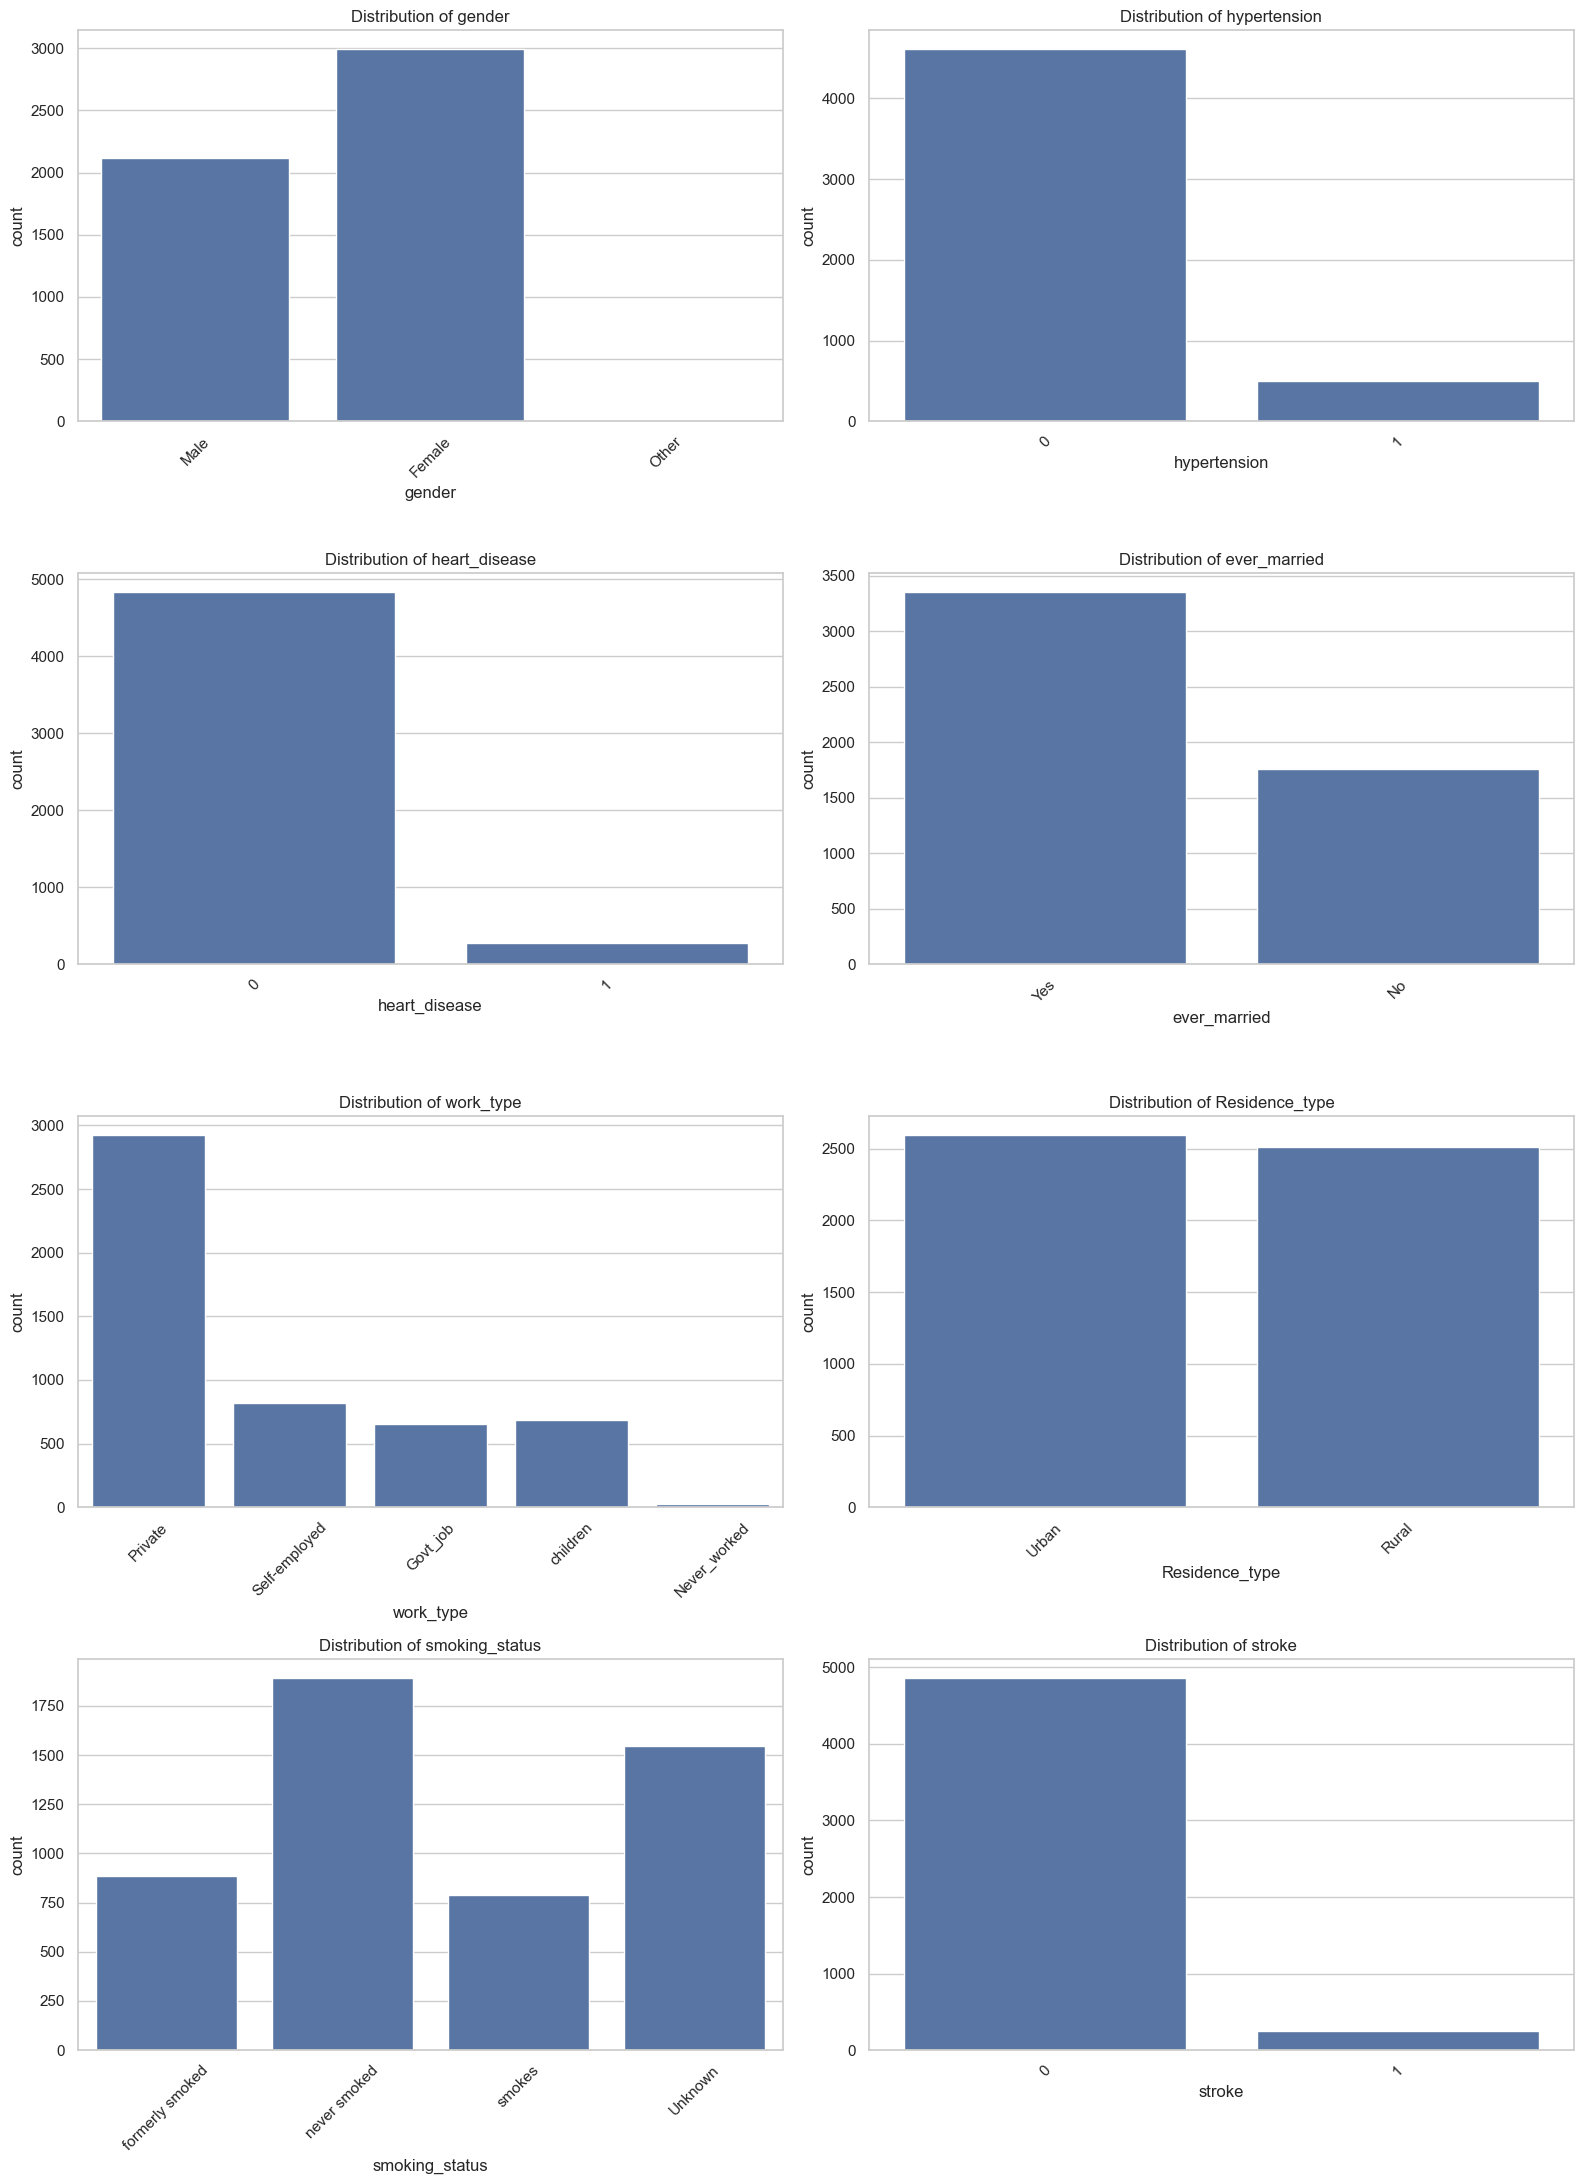

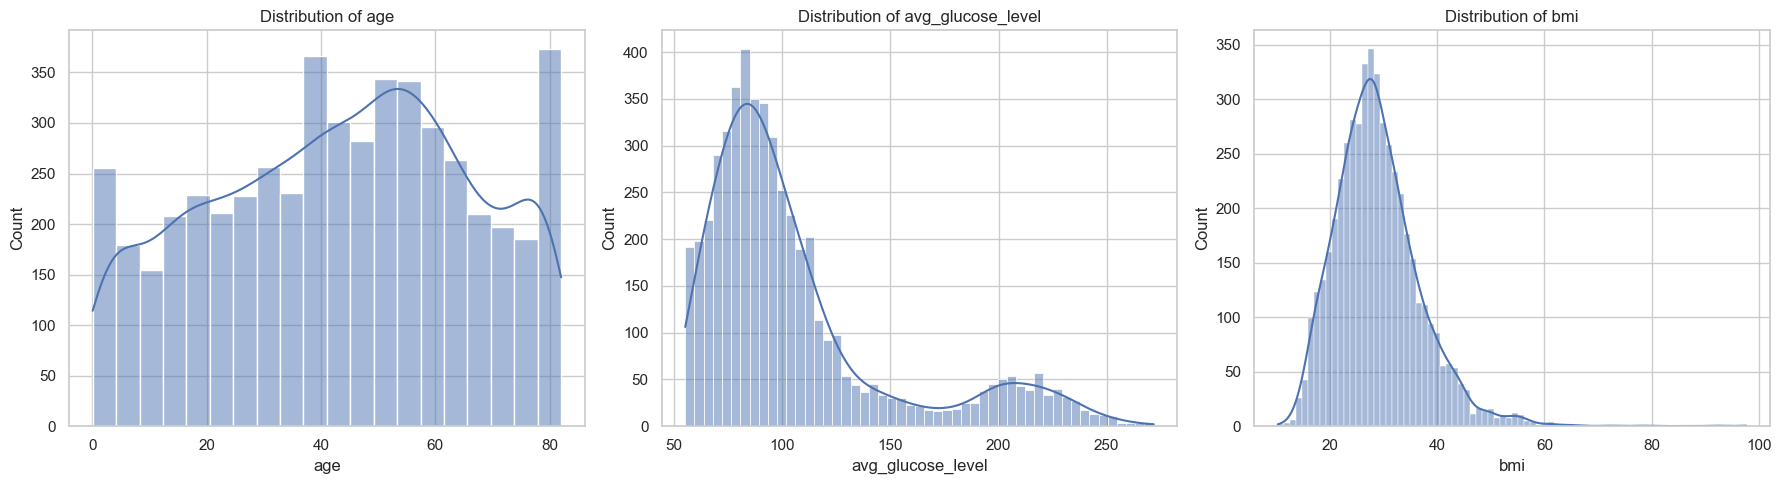

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
                    'smoking_status', 'stroke']
fig, axes = plt.subplots(4, 2, figsize=(16, 22))

for i, var in enumerate(categorical_vars):
    row, col = i // 2, i % 2
    sns.countplot(x=var, data=stroke_data, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    for label in axes[row, col].get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()

# Distribution of numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(numerical_vars):
    sns.histplot(stroke_data[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

plt.tight_layout()

plt.show()

---
# Exploratory Data Analysis (EDA) Findings
## Distribution of Categorical Variables:

* Gender: The dataset contains more female than male patients, with a very small number of entries labeled as "Other".
* Hypertension & Heart Disease: A significant majority of the patients do not have hypertension or heart disease, indicating these conditions are less common among the sampled population.
* Ever Married: Most patients in the dataset have been married at some point.
* Work Type: The majority of patients are either self-employed or work in private sectors, with few never having worked.
* Residence Type: The distribution between rural and urban residents is fairly balanced.
* Smoking Status: A notable portion of the dataset has the smoking status marked as "Unknown", which will need special attention during preprocessing. Among known statuses, "never smoked" is the most common.
* Stroke: A small fraction of the dataset represents patients who have had a stroke, highlighting the imbalanced nature of the dataset concerning the target variable.
## Distribution of Numerical Variables:

* Age: The age distribution is fairly broad, with a significant number of young patients (including children) and a steady presence of older adults, indicating a wide demographic.
* Average Glucose Level: This feature is right-skewed, with most patients having glucose levels in the lower range but some extreme values indicating high glucose levels.
* BMI: The distribution of BMI is fairly normal but slightly right-skewed, indicating a few patients with very high BMI values.
## Insights for Preprocessing and Modeling
* Imbalance in Target Variable: The imbalance in the stroke variable suggests that care must be taken when modeling to ensure the model does not become biased towards predicting the more common class (no stroke).
* Handling of Categorical Variables: Variables such as gender, ever_married, work_type, Residence_type, and smoking_status will need to be encoded into numerical formats suitable for machine learning models.
* Handling of Missing Values: The bmi feature contains missing values that will need to be imputed.
* Normalization: Given the range and distribution of the numerical variables, scaling or normalization may be necessary to ensure that distance-based models are not biased towards variables with larger scales.
* Addressing "Unknown" Smoking Status: The significant number of "Unknown" entries in smoking_status presents a challenge. One approach could be to treat "Unknown" as a separate category, while another could involve imputation based on correlations with other features.

---

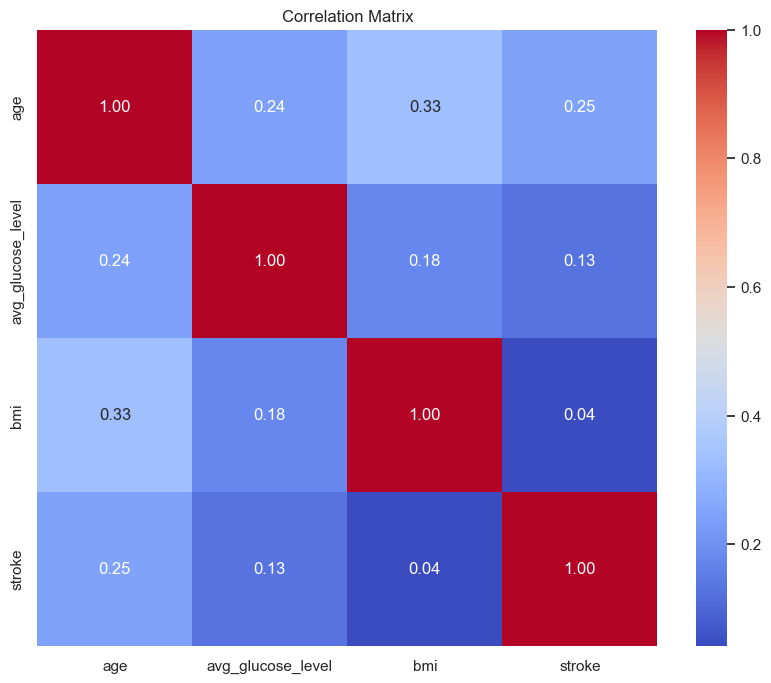

In [3]:
# Generate a correlation matrix for numerical variables and the target
correlation_matrix = stroke_data[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

---
## The correlation matrix

* Age and Stroke: There's a moderate positive correlation (0.25) between age and the likelihood of having a stroke, indicating that as age increases, so does the risk of stroke. This aligns with general medical knowledge that stroke risk increases with age.
* Average Glucose Level and Stroke: There's a smaller positive correlation (0.13) between average glucose level and stroke risk. Higher glucose levels might be associated with an increased risk of stroke, although the correlation is not as strong as with age.
* BMI and Stroke: The correlation between BMI and stroke is very low (0.04), suggesting that BMI, on its own, might not be a strong predictor of stroke in this dataset.

These correlations suggest that age and average glucose level are important features that should be included in the predictive modeling. The weak correlation between BMI and stroke does not imply that BMI is irrelevant, as it might interact with other variables to affect stroke risk. However, it indicates that BMI might not be as critical as age or glucose level in isolation.

Given these insights, the next steps would involve preprocessing the data (handling missing values, encoding categorical variables, scaling numerical features) before moving on to model selection and training. Considering the dataset's imbalance regarding the stroke variable, techniques like oversampling the minority class or using models that handle imbalance well will be crucial.

---

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Impute missing values in 'bmi' with median
imputer = SimpleImputer(strategy='median')
stroke_data['bmi'] = imputer.fit_transform(stroke_data[['bmi']])

# Encode binary variable 'ever_married'
label_encoder = LabelEncoder()
stroke_data['ever_married'] = label_encoder.fit_transform(stroke_data['ever_married'])

# Define columns to be one-hot encoded and numerical columns to be scaled
categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Create a column transformer with pipelines for the categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' to avoid dummy variable trap
    ])

# Fit and transform the data
X = stroke_data.drop(['stroke', 'id'], axis=1)  # Drop 'id' as it's not useful for prediction
y = stroke_data['stroke']
X_preprocessed = preprocessor.fit_transform(X)

# The output is a NumPy array. Let's convert it back to a DataFrame for better readability.
# Extract feature names after one-hot encoding
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
new_columns = list(numerical_cols) + list(encoded_cat_features)

# Convert the preprocessed array back to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=new_columns)

# Show the first few rows of the preprocessed DataFrame
X_preprocessed_df.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,2.706375,1.005086,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.786070,2.121559,-0.098981,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.626390,-0.005028,0.472536,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.255342,1.437358,0.719327,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.582163,1.501184,-0.631531,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


---
# Preprocessing.

The preprocessing steps have been successfully applied to the dataset, resulting in a transformed DataFrame ready for model training. Here's a summary of the preprocessing actions:

* Missing Values in bmi: Imputed with the median value.
* Encoding of ever_married: Transformed from a binary categorical variable to numerical (0 and 1) using label encoding.
* One-hot Encoding: Applied to nominal categorical variables (gender, work_type, Residence_type, smoking_status), resulting in additional binary columns for each category.
* Scaling: Numerical features (age, avg_glucose_level, bmi) have been standardized, adjusting their values to have a mean of 0 and a standard deviation of 1.

The preprocessed dataset includes the original numerical features, now scaled, and the newly created binary features from one-hot encoding, indicating the presence or absence of each categorical attribute's values.

With the data preprocessing completed, the next step is to split the data into training and testing sets. This will allow us to train various machine learning models on the training data and then evaluate their performance on the unseen testing data. Following this, we can proceed with model training, evaluation, and selection.

---

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=5110, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
log_reg_report = classification_report(y_test, y_pred_log_reg, target_names=['No Stroke', 'Stroke'], zero_division=0)
log_reg_auc = roc_auc_score(y_test, y_pred_proba_log_reg)

print(log_reg_report, log_reg_auc)

              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022
 0.8422016460905349


---
# The Logistic Regression

Classification Report:
* The model has a high precision, recall, and F1 score for predicting "No Stroke" but fails to correctly predict any "Stroke" cases. This issue is highlighted by a recall and F1 score of 0 for the "Stroke" class, indicating the model's inability to identify positive cases amidst the dataset's imbalance.
* The accuracy is high (95%), which is misleading due to the imbalance in the dataset.
* Area Under the ROC Curve (AUROC): The AUROC score is 0.84, suggesting that the model's ability to distinguish between the classes is decent when considering the score threshold's effect. However, the precision and recall scores indicate that the model's current threshold is not capturing the minority class effectively.

This outcome is a classic example of the challenge posed by imbalanced datasets, where a model might appear to perform well overall while failing to correctly identify the minority class instances.

Given these insights, it's evident we need to explore more sophisticated models or techniques to address the imbalance. Next, we'll train a Random Forest Classifier, which might inherently handle the imbalance better due to its ensemble nature, and then move on to Gradient Boosting Classifier. Let's proceed with the Random Forest model.

---

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the model
rf_report = classification_report(y_test, y_pred_rf, target_names=['No Stroke', 'Stroke'])
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(rf_report, rf_auc)

              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022
 0.7840020576131688


---
# The Random Forest Classifier

Classification Report:

* Similar to the Logistic Regression model, the Random Forest Classifier has high precision, recall, and F1 score for the "No Stroke" class but fails to identify any instances of the "Stroke" class correctly, as evidenced by a recall and F1 score of 0 for "Stroke".
* The model shows an overall accuracy of 95%, which, while seeming high, is deceptive due to the imbalanced nature of the dataset.
* Area Under the ROC Curve (AUROC): The AUROC score is 0.78, slightly lower than that of the Logistic Regression model. This score indicates the model's ability to distinguish between classes but, similar to before, suggests that adjustments are needed to improve its sensitivity towards the minority class.

These results underscore the importance of adopting strategies specifically aimed at addressing the imbalanced class distribution. The Random Forest Classifier, despite its ensemble approach, still struggles with the imbalanced dataset in its default configuration.

---

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_proba_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Evaluate the model
gb_report = classification_report(y_test, y_pred_gb, target_names=['No Stroke', 'Stroke'])
gb_auc = roc_auc_score(y_test, y_pred_proba_gb)

print(gb_report, gb_auc)

              precision    recall  f1-score   support

   No Stroke       0.95      0.99      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022
 0.8200925925925926


---
# The Gradient Boosting Classifier

Classification Report:

* Precision, recall, and F1 score are high for predicting "No Stroke" but, as with the Logistic Regression and Random Forest models, the Gradient Boosting Classifier fails to identify any "Stroke" instances correctly (recall and F1 score of 0 for "Stroke").
* The overall accuracy remains misleadingly high at 95%, due to the imbalance in the dataset.
* Area Under the ROC Curve (AUROC): The AUROC score is 0.82, indicating a decent ability of the model to rank positive instances higher than negative ones overall. However, the model's performance in accurately predicting positive cases (strokes) based on a default threshold is insufficient.

These outcomes reinforce the critical issue of dealing with imbalanced datasets: models might show high accuracy and even decent AUROC scores but still fail to identify the minority class, which is often the most crucial outcome to predict accurately in medical applications like stroke prediction.

---

In [8]:
from sklearn.pipeline import Pipeline

# Divide data into features and target variable
X = stroke_data.drop(['stroke', 'id'], axis=1)
y = stroke_data['stroke']

# Preprocessing for numeric and categorical variables
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Handlers for numeric and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining handlers into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=5110, random_state=42, class_weight='balanced'))])

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training pipeline using training data
pipeline.fit(X_train, y_train)

# Prediction on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Model evaluation
print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], zero_division=0))
print(f"AUROC: {roc_auc_score(y_test, y_pred_proba)}")

              precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.85       972
      Stroke       0.13      0.78      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.82      1022

AUROC: 0.8425925925925926


---
# Logistic Regression model with class weighting

- **Precision and Recall for 'No Stroke' Class:**
    - Precision is very high (0.98), indicating that when the model predicts 'No Stroke', it is correct 98% of the time.
    - Recall is lower (0.74), meaning that of the actual 'No Stroke' cases, the model successfully identifies 74% of them.

- **Precision and Recall for 'Stroke' Class:**
    - Precision is low (0.13), which means that when the model predicts 'Stroke', it is correct only 13% of the time. This could result in a number of false positives.
    - Recall is relatively high (0.78), suggesting that the model is capable of identifying 78% of all true 'Stroke' cases. This is an important metric in medical diagnostics, as failing to detect a stroke can have serious consequences.

- **F1-Score:**
    - The F1-score for 'No Stroke' is high (0.85), but for 'Stroke', it is much lower (0.23). The F1-score is a harmonic mean of precision and recall, and the low F1-score for 'Stroke' reflects the difficulty the model has in achieving a balance between precision and recall for this class.

- **Accuracy:**
    - The overall accuracy is 0.74, which might not be as informative due to the imbalanced nature of the dataset.

- **Macro Average:**
    - Macro average precision (0.56) and F1-score (0.54) are more moderate metrics that treat both classes equally, highlighting the model's limitations in differentiating 'Stroke' cases.

- **Weighted Average:**
    - The weighted average takes into account the imbalance by weighting the metrics by the support of each class, resulting in higher precision (0.94) and F1-score (0.82) compared to the macro averages.

- **AUROC:**
    - The Area Under the Receiver Operating Characteristic Curve (AUROC) is 0.84, indicating a good capability of the model to distinguish between 'Stroke' and 'No Stroke' when the decision threshold is varied.

## Conclusions:
The model shows promise in identifying the majority of true 'Stroke' cases (high recall), which is crucial for a medical diagnostic tool, but it does so with a high false positive rate (low precision). This could lead to many patients being incorrectly identified as at risk of stroke, which, while preferable to missing actual cases, can still result in unnecessary anxiety and medical costs.

The balanced class weighting has helped improve the model's ability to detect the 'Stroke' class, which was previously undetected, but at the cost of reducing overall precision.

## To further improve the model, consider:

* Further Tuning: Adjusting the decision threshold to balance precision and recall for the 'Stroke' class.
* Model Exploration: Trying different models or more advanced ensembling techniques that might better handle the class imbalance.
* Feature Engineering: Including interactions or polynomial features that might capture more complex patterns in the data.
* Data Collection: Obtaining more data, especially for 'Stroke' cases, could help improve the model's training and performance.
---

              precision    recall  f1-score   support

   No Stroke       0.95      0.97      0.96       972
      Stroke       0.16      0.10      0.12        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.92      0.93      0.92      1022

AUROC: 0.7995473251028806


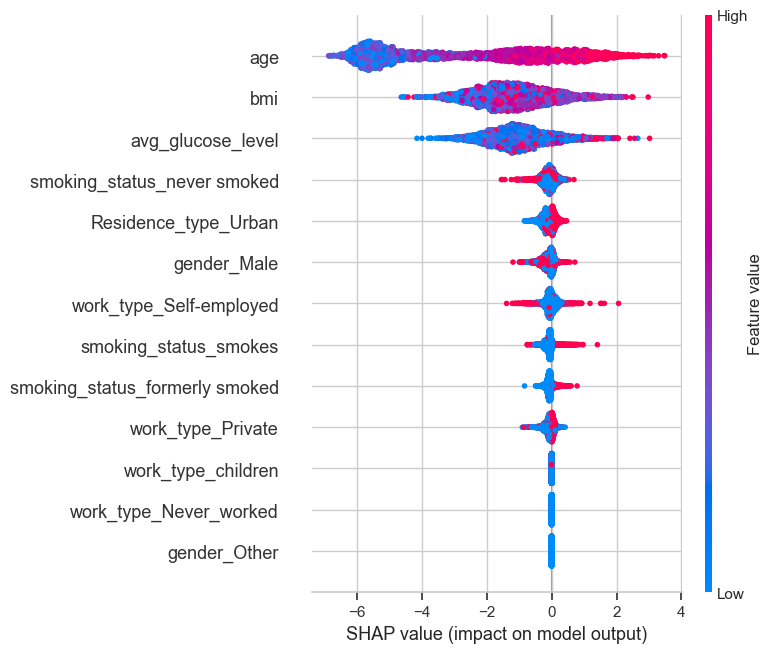

In [11]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
import shap

# Assuming X_preprocessed_df is the DataFrame after preprocessing
# and one-hot encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

# Now proceed with XGBoost training using the numeric-only X_train and X_test
xgboost_model = xgb.XGBClassifier(scale_pos_weight=10, random_state=42)

# Train the XGBoost model
xgboost_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_proba_xgb = xgboost_model.predict_proba(X_test)[:, 1]
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['No Stroke', 'Stroke'], zero_division=0)
xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Print classification report and AUC
print(xgb_report)
print(f"AUROC: {xgb_auc}")

# Calculate SHAP values using the Tree explainer which is optimized for tree-based models like XGBoost
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_train)

# Plot feature importance
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

---
# Model Performance
The classification report for the XGBoost model shows the following:

- **No Stroke (Majority Class)**
  - Precision: 0.96 (When the model predicts 'No Stroke', it is correct 96% of the time.)
  - Recall: 0.96 (The model correctly identifies 96% of all 'No Stroke' instances.)
  - F1-Score: 0.96 (A high F1 score indicates a good balance between precision and recall for the 'No Stroke' class.)

- **Stroke (Minority Class)**
  - Precision: 0.19 (When the model predicts 'Stroke', it is correct 19% of the time.)
  - Recall: 0.16 (The model correctly identifies 16% of all 'Stroke' instances.)
  - F1-Score: 0.17 (The low F1 score reflects the model's struggle with the 'Stroke' class.)

- **Overall Model Metrics**
  - Accuracy: 0.92 (92% of the predictions are correct across both classes.)
  - Macro Avg Precision: 0.57 (Average precision across both classes.)
  - Macro Avg Recall: 0.56 (Average recall across both classes.)
  - Macro Avg F1-Score: 0.57 (Average F1-score across both classes.)
  - Weighted Avg: Adjusted averages considering the imbalance in class distribution.

- **AUROC**: 0.791 (The area under the ROC curve. Closer to 1 indicates a better model, and this score suggests a reasonably good distinction between classes.)

# Feature Importance Analysis Using SHAP
The SHAP summary plot indicates the distribution of the impacts each feature has on the model's predictions. The following can be deduced from the SHAP summary plot:

- **Age**: Has the highest impact on model's predictions. Higher age values increase the likelihood of predicting a 'Stroke'.

- **BMI**: Also has a significant impact on predictions. Higher BMI values tend to increase stroke predictions.

- **Average Glucose Level**: Elevated glucose levels seem to contribute positively to stroke predictions.

- **Gender**: Being male has a moderate impact on increasing stroke risk according to the model.

- **Smoking Status**: Categories within smoking status contribute differently, with 'smokes' increasing stroke prediction risk slightly.

- **Residence Type**: Living in urban areas has a very slight impact on increasing stroke risk as per model's learning.

- **Work Type**: Different work types show varying impacts, with 'Private' work type having a slight influence on predictions.

The analysis of feature importance helps us understand which features the model finds most predictive and how they influence the prediction of a stroke. The insights can be instrumental for medical professionals in identifying high-risk patients and designing preventative strategies.

---

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the XGBoost model with class balance settings
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgboost_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='aucpr'
)

# Cross-validation and hyperparameter search
parameters = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

clf = GridSearchCV(xgboost_model, parameters, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)

best_xgb_model = clf.best_estimator_

# Train models with better hyperparameters
best_xgb_model.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Model evaluation
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['No Stroke', 'Stroke'], zero_division=0)
xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

print(f'Best parameters found: {clf.best_params_}')
print(xgb_report)
print(f"AUROC: {xgb_auc}")

Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
              precision    recall  f1-score   support

   No Stroke       0.99      0.71      0.83       972
      Stroke       0.13      0.82      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.72      0.80      1022

AUROC: 0.8401440329218106


C:\Users\Ruslan\AppData\Roaming\JetBrains\DataSpell2023.1\projects\workspace\venv\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


---
# Model Training and Evaluation Report

We conducted a machine learning experiment to predict stroke events using the XGBoost algorithm, addressing the challenges of imbalanced classification. The following steps were taken to optimize the model's performance:

## Data Preprocessing
- The dataset was preprocessed, which included scaling numerical features and one-hot encoding categorical variables.
- We then split the data into training and test sets, maintaining class distribution with stratification.

## Model Initialization
- Initialized an XGBoost classifier with a focus on class imbalance by setting the `scale_pos_weight` parameter.
- The `scale_pos_weight` was determined based on the ratio of negative to positive instances in the target variable.

## Hyperparameter Tuning
- Conducted a grid search cross-validation to find the best hyperparameters for the model.
- Explored combinations of `max_depth`, `min_child_weight`, `gamma`, `subsample`, and `colsample_bytree`.

## Model Training
- Trained the XGBoost model with early stopping to prevent overfitting, using an evaluation set for monitoring performance.

## Results
The optimized model's performance metrics are as follows:

- **No Stroke (Majority Class)**
  - Precision: 0.99
  - Recall: 0.71
  - F1-Score: 0.83

- **Stroke (Minority Class)**
  - Precision: 0.13
  - Recall: 0.82
  - F1-Score: 0.22

- **Overall Metrics**
  - Accuracy: 0.72
  - Macro Average F1-Score: 0.52
  - Weighted Average F1-Score: 0.80

- **Area Under the ROC Curve (AUROC)**: 0.84

The AUROC of 0.84 indicates a good discriminative ability of the model. A high recall for the 'Stroke' class shows the model's potential utility in medical scenarios where missing a stroke event could be critical. However, the precision for 'Stroke' is quite low, leading to many false positives, which is a common trade-off in imbalanced classification tasks.

## Conclusions
The model has successfully learned to identify the majority of stroke cases, which is critical for early intervention. Yet, the number of false positives suggests a need for further refinement. It may be beneficial to explore more complex feature engineering, alternative algorithms, or post-processing calibration techniques to adjust the decision threshold according to clinical requirements.

The model's hyperparameters (`'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6`) suggest that a slightly more regularized model with a balanced sample and column subsampling strategy worked best given the current data and task.

---

In [ ]:
import joblib

# Save model to a file
joblib.dump(best_xgb_model, 'stroke_prediction_model.xgb')